# *Assignment 1*

**Name:** *Bharat Sharma*
**Roll No:** 240265
**Assignment:** 1

## Preprocessing and Data Cleaning

### Loading the Dataset and displaying the data

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier

df = pd.read_csv('movie.csv')
df.head()


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


### Checking for Missing Values and Duplicates, and removing them

In [2]:
df = df.drop_duplicates()
df = df.dropna()
print(df.shape,'\n')

# Check if 'label' column contains values other than 0 and 1
non_binary_values = ~df['label'].isin([0, 1])

# Count non-binary values
non_binary_count = non_binary_values.sum()
print(f"Number of non-binary values in 'label' column: {non_binary_count}")

# See what the non-binary values are (if any)
if non_binary_count > 0:
    unique_non_binary = df.loc[non_binary_values, 'label'].unique()
    print(f"Unique non-binary values found: {unique_non_binary}")

    # Show a few examples of rows with non-binary values
    print("\nSample rows with non-binary values:")
    print(df[non_binary_values].head())
else:
    print("The 'label' column contains only binary values (0 and 1).")

(39723, 2) 

Number of non-binary values in 'label' column: 0
The 'label' column contains only binary values (0 and 1).


### Distribution of 0/1 & Visualizing the Data

Distribution of values in 'label' column:
label
1    19908
0    19815
Name: count, dtype: int64

Percentage distribution:
label
1    50.12%
0    49.88%
Name: proportion, dtype: object


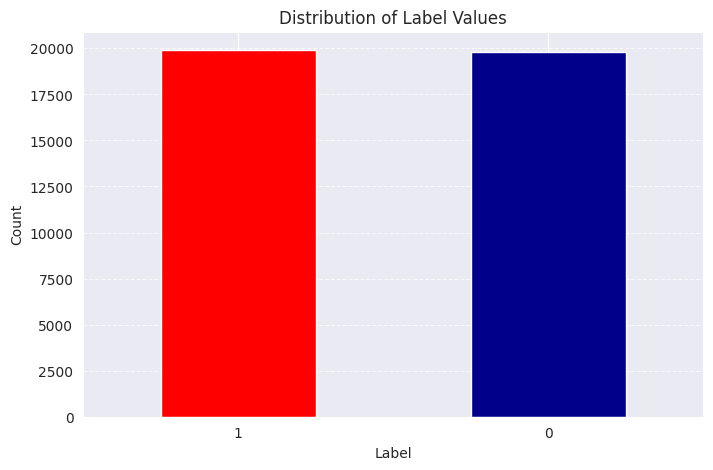

In [3]:
import matplotlib.pyplot as plt

# Count occurrences of each value in the 'label' column
label_counts = df['label'].value_counts()
print("Distribution of values in 'label' column:")
print(label_counts)

# For percentages
label_percentages = df['label'].value_counts(normalize=True) * 100
print("\nPercentage distribution:")
print(label_percentages.map('{:.2f}%'.format))

plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['red', 'darkblue'])
plt.title('Distribution of Label Values')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Preparing the Data for Model Training

In [4]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/bharat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bharat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bharat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#Download punkt_tab using the following:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


KeyboardInterrupt: Interrupted by user

In [7]:
# Load resources once
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

# Apply to DataFrame
df['clean_review'] = df['text'].apply(preprocess)
df.head()



,text,label,clean_review
0,I grew up (b. 1965) watching and loving the Th...,0,grew watching loving thunderbird mate school w...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dad army fan nothing ever change g...


## Splitting the Data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

X = df['clean_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Different Models and their Evaluation

### The most simple model: Logistic Regression

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

Accuracy: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3963
           1       0.88      0.90      0.89      3982

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



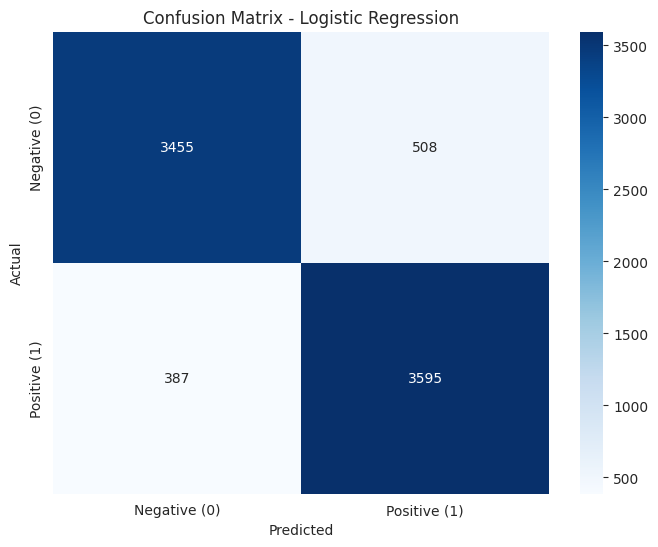

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

ROC-AUC Score: 0.9548


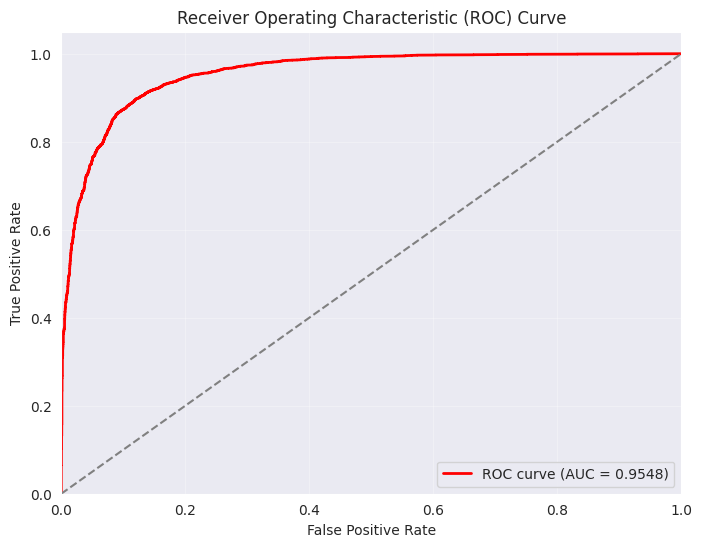

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get probability scores for the positive class
y_probs = lr_model.predict_proba(X_test_tfidf)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Support Vector Machine (SVM)

In [24]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize Linear SVM model
# Using CalibratedClassifierCV to get probability estimates for ROC-AUC
base_svm = LinearSVC(random_state=42, max_iter=10000)
svm_model = CalibratedClassifierCV(base_svm)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)
y_probs_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]

SVM Accuracy: 0.8853

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3963
           1       0.88      0.89      0.89      3982

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



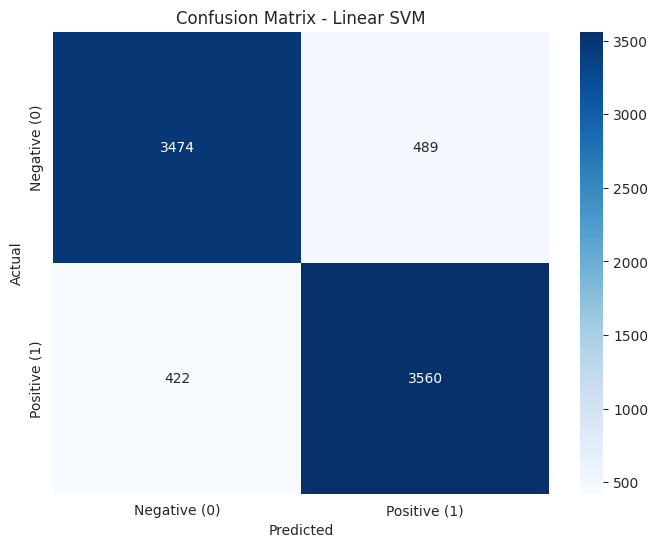

In [25]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Create and plot confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

ROC-AUC Score: 0.9535


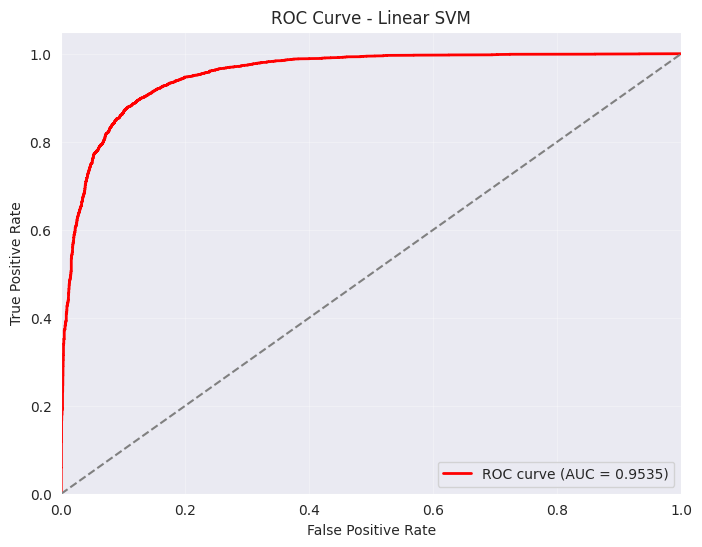

In [26]:
# Calculate ROC-AUC
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)
print(f"ROC-AUC Score: {roc_auc_svm:.4f}")

# Plot ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Naive Bayes Classifier(Bernoulli baba ki jai!)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

binary_vec = CountVectorizer(binary=True)
X_train_bin = binary_vec.fit_transform(X_train)
X_test_bin = binary_vec.transform(X_test)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize and train Naive Bayes model
# Note: We'll use the binary vectorized data which works well with Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_bin, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_bin)
y_probs_nb = nb_model.predict_proba(X_test_bin)[:, 1]

Naive Bayes Accuracy: 0.8550

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      3963
           1       0.87      0.84      0.85      3982

    accuracy                           0.86      7945
   macro avg       0.86      0.86      0.85      7945
weighted avg       0.86      0.86      0.85      7945



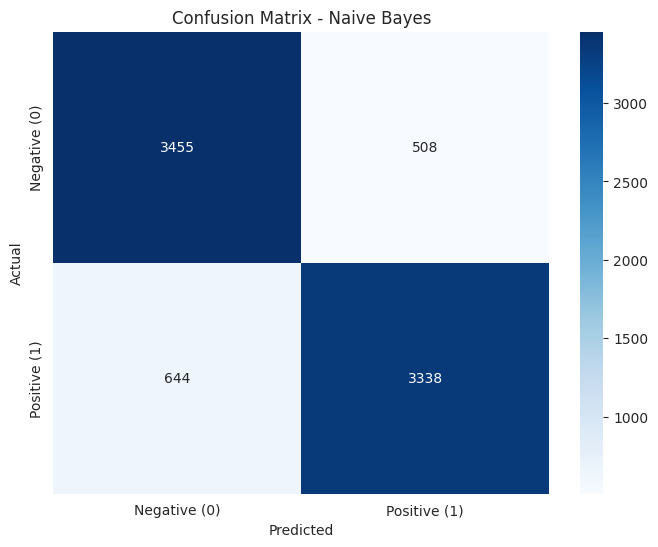

In [27]:
# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Create and plot confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

ROC-AUC Score: 0.9236


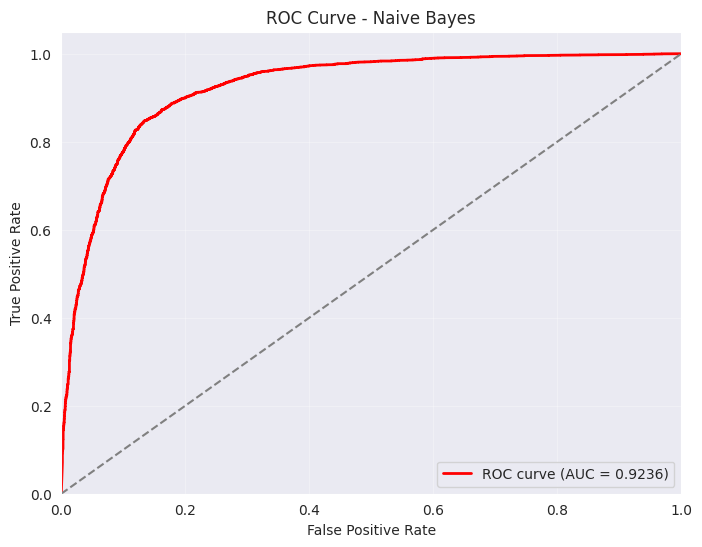

In [28]:
# Calculate ROC-AUC
roc_auc_nb = roc_auc_score(y_test, y_probs_nb)
print(f"ROC-AUC Score: {roc_auc_nb:.4f}")

# Plot ROC curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Random Forest Classifier

In [15]:
count_vec = CountVectorizer()
X_train_count = count_vec.fit_transform(X_train)
X_test_count = count_vec.transform(X_test)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_count, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_count)
y_probs_rf = rf_model.predict_proba(X_test_count)[:, 1]

Random Forest Accuracy: 0.8537

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3963
           1       0.85      0.86      0.85      3982

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



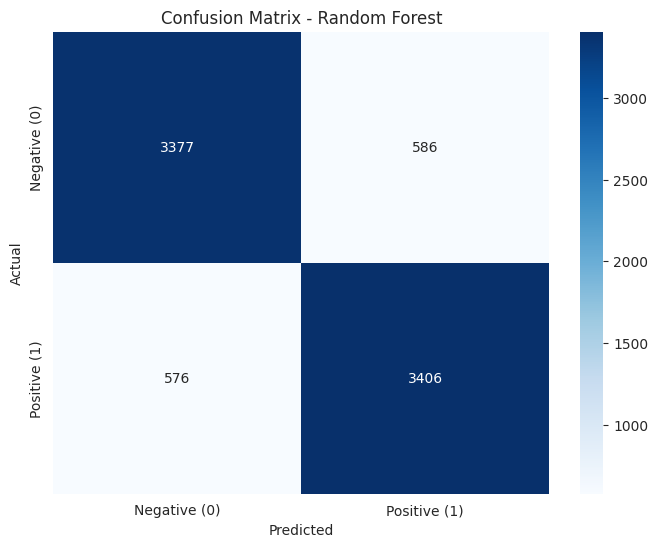

In [29]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Create and plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

ROC-AUC Score: 0.9268


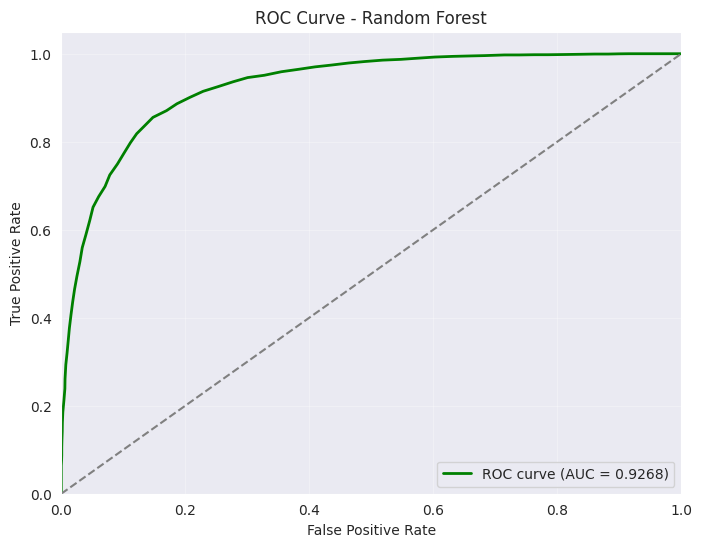

In [30]:
# Calculate ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

# Plot ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Neural Network Classifier

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Choose maxlen based on distribution (e.g., 100-300)
X_train_pad = pad_sequences(X_train_seq, maxlen=200, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=200, padding='post', truncating='post')


2025-06-04 18:21:12.420766: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 18:21:12.421518: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 18:21:12.424390: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 18:21:12.431613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749041472.441883    9742 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749041472.44


Fold 1/5
Epoch 1/10


/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
E0000 00:00:1749041480.517136    9742 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1749041480.519967    9742 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6286 - loss: 0.6334 - val_accuracy: 0.8482 - val_loss: 0.3644
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8748 - loss: 0.3094 - val_accuracy: 0.8497 - val_loss: 0.3390
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9053 - loss: 0.2419 - val_accuracy: 0.8532 - val_loss: 0.3423
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9132 - loss: 0.2185 - val_accuracy: 0.8609 - val_loss: 0.3366
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9233 - loss: 0.1982 - val_accuracy: 0.8729 - val_loss: 0.3261
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.1751 - val_accuracy: 0.8778 - val_loss: 0.3246
Epoch 7/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9431 - loss: 0.1602 - val_accuracy: 0.8784 - val_loss: 0.3310
Epoch 8/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9497 - loss: 0.1460 - val_accuracy: 0.8752 - val_

/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6097 - loss: 0.6461 - val_accuracy: 0.8636 - val_loss: 0.3531
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8657 - loss: 0.3306 - val_accuracy: 0.8781 - val_loss: 0.2998
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8975 - loss: 0.2620 - val_accuracy: 0.8735 - val_loss: 0.2977
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9171 - loss: 0.2201 - val_accuracy: 0.8738 - val_loss: 0.3062
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9259 - loss: 0.1993 - val_accuracy: 0.8787 - val_loss: 0.3016
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9314 - loss: 0.1852 - val_accuracy: 0.8763 - val_loss: 0.3063
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
Fold 2 - Loss: 0.2977, Accuracy: 0.8735, AUC: 0.9488

Fold 3/5
Epoch 1/10


/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6273 - loss: 0.6430 - val_accuracy: 0.8494 - val_loss: 0.3672
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8605 - loss: 0.3379 - val_accuracy: 0.8812 - val_loss: 0.2924
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8969 - loss: 0.2579 - val_accuracy: 0.8715 - val_loss: 0.3120
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9138 - loss: 0.2283 - val_accuracy: 0.8694 - val_loss: 0.3080
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9268 - loss: 0.1976 - val_accuracy: 0.8795 - val_loss: 0.2972
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
Fold 3 - Loss: 0.2924, Accuracy: 0.8812, AUC: 0.9493

Fold 4/5
Epoch 1/10


/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6127 - loss: 0.6419 - val_accuracy: 0.8291 - val_loss: 0.3795
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8704 - loss: 0.3213 - val_accuracy: 0.8883 - val_loss: 0.2856
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9008 - loss: 0.2510 - val_accuracy: 0.8806 - val_loss: 0.2869
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9148 - loss: 0.2180 - val_accuracy: 0.8821 - val_loss: 0.2867
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9247 - loss: 0.1983 - val_accuracy: 0.8828 - val_loss: 0.2939
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
Fold 4 - Loss: 0.2856, Accuracy: 0.8883, AUC: 0.9525

Fold 5/5
Epoch 1/10


/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6294 - loss: 0.6359 - val_accuracy: 0.7970 - val_loss: 0.4100
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8747 - loss: 0.3179 - val_accuracy: 0.8678 - val_loss: 0.3138
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8967 - loss: 0.2592 - val_accuracy: 0.8774 - val_loss: 0.2978
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9162 - loss: 0.2194 - val_accuracy: 0.8796 - val_loss: 0.2936
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9266 - loss: 0.1981 - val_accuracy: 0.8735 - val_loss: 0.3111
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9385 - loss: 0.1717 - val_accuracy: 0.8779 - val_loss: 0.3090
Epoch 7/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9402 - loss: 0.1683 - val_accuracy: 0.8725 - val_loss: 0.3314
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
Fold 5 - Loss: 0.2936, Accuracy: 0.8796, AUC: 0.9499

Cross-Validation R

/home/bharat/PycharmProjects/Pulpnet/.venv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6138 - loss: 0.6441 - val_accuracy: 0.8584 - val_loss: 0.3658
Epoch 2/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8675 - loss: 0.3253 - val_accuracy: 0.8705 - val_loss: 0.3134
Epoch 3/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8984 - loss: 0.2542 - val_accuracy: 0.8776 - val_loss: 0.2961
Epoch 4/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9195 - loss: 0.2096 - val_accuracy: 0.8540 - val_loss: 0.3558
Epoch 5/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.1965 - val_accuracy: 0.8573 - val_loss: 0.3500
Epoch 6/10
795/795 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9286 - loss: 0.1909 - val_accuracy: 0.8532 - val_loss: 0.3756
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8826 - loss: 0.2904  

Final Model Test Accuracy: 0.8822
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step

Classification Report:
              precision    recall  f1-score   support

         

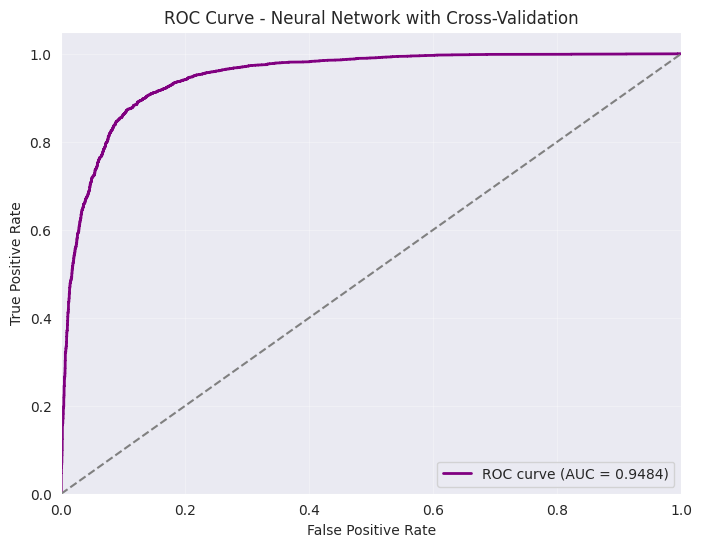

In [18]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# Define K-fold Cross Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize performance metrics
val_accuracies = []
val_losses = []
val_auc_scores = []

fold = 1

# Perform K-fold cross-validation
for train_idx, val_idx in kf.split(X_train_pad):
    print(f"\nFold {fold}/{k_folds}")

    # Split data for this fold
    X_train_fold, X_val_fold = X_train_pad[train_idx], X_train_pad[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Create and compile model
    model = Sequential([
        # Input layer - Embedding layer
        Embedding(input_dim=10000, output_dim=16, input_length=200),

        # Global average pooling to reduce dimensions
        GlobalAveragePooling1D(),

        # Hidden layers
        Dense(24, activation='relu'),
        Dropout(0.2),

        # Output layer
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=10,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate on validation fold
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Calculate AUC for this fold
    y_pred_probs = model.predict(X_val_fold)
    auc_score = roc_auc_score(y_val_fold, y_pred_probs)

    # Store metrics
    val_accuracies.append(accuracy)
    val_losses.append(loss)
    val_auc_scores.append(auc_score)

    print(f"Fold {fold} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}")
    fold += 1

# Print average performance across folds
print("\nCross-Validation Results:")
print(f"Average Accuracy: {np.mean(val_accuracies):.4f} ± {np.std(val_accuracies):.4f}")
print(f"Average Loss: {np.mean(val_losses):.4f} ± {np.std(val_losses):.4f}")
print(f"Average AUC: {np.mean(val_auc_scores):.4f} ± {np.std(val_auc_scores):.4f}")

# Train final model on all training data
final_model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=200),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

final_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train on all training data, with a validation split for monitoring
history = final_model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on test set
loss, accuracy = final_model.evaluate(X_test_pad, y_test)
print(f"\nFinal Model Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_probs = final_model.predict(X_test_pad)
y_pred_nn = (y_pred_probs > 0.5).astype(int).flatten()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Calculate ROC-AUC
roc_auc_nn = roc_auc_score(y_test, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc_nn:.4f}")

# Plot ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network with Cross-Validation')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## Models Ensemble!

![Models](https://i.ibb.co/8DqgN8By/models.png)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
Ensemble Model Accuracy: 0.8915

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3963
           1       0.89      0.89      0.89      3982

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



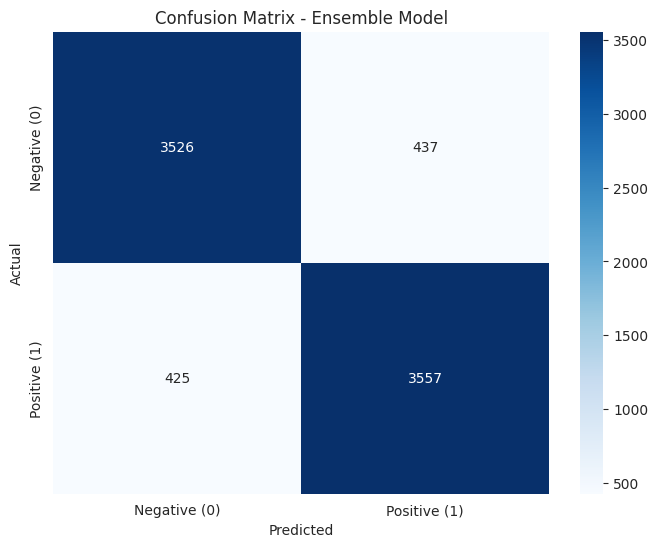

ROC-AUC Score: 0.9566


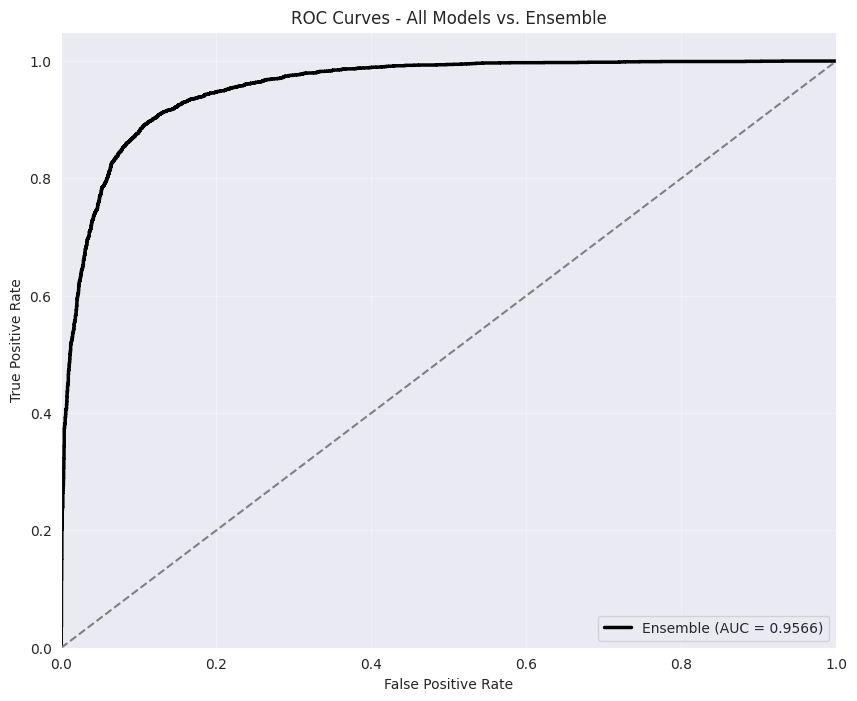


Model Performance Comparison:
                 Model  Accuracy   ROC-AUC
0             Ensemble  0.891504  0.956578
1  Logistic Regression  0.887351  0.954759
2                  SVM  0.885337  0.953533
3       Neural Network  0.887351  0.948390
4        Random Forest  0.853744  0.926807
5          Naive Bayes  0.855003  0.923578


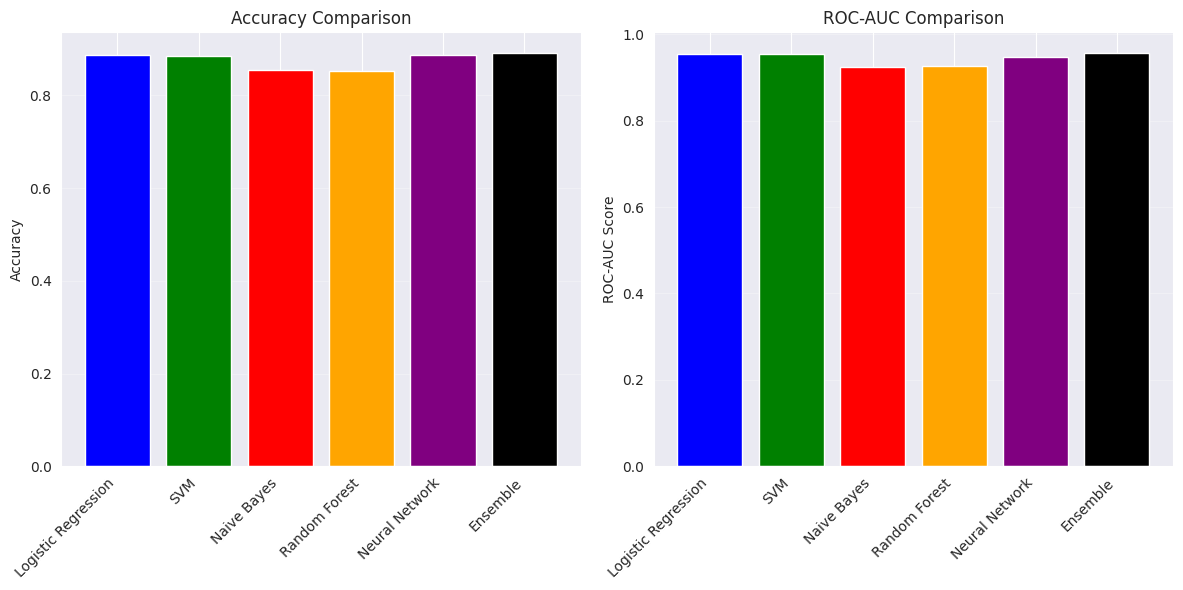

In [32]:
# Define a function to create the neural network model
def create_nn_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=16, input_length=200),
        GlobalAveragePooling1D(),
        Dense(24, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model

# Wrap the Keras model in a scikit-learn compatible classifier
nn_clf = KerasClassifier(
    build_fn=create_nn_model,
    epochs=10,
    batch_size=32,
    verbose=0,
    callbacks=[EarlyStopping(monitor='loss', patience=3)]
)

# Create ensemble with soft voting
# Note: The neural network needs to be pre-fit to the appropriate data format
ensemble = VotingClassifier(estimators=[
    ('lr', lr_model),              # Logistic Regression (already trained on TF-IDF)
    ('svm', svm_model),            # SVM (already trained on TF-IDF)
    ('nb', nb_model),              # Naive Bayes (already trained on binary vectors)
    ('rf', rf_model),              # Random Forest (already trained on count vectors)
], voting='soft')

# Since our models are trained on different feature representations,
# we need to make predictions individually and combine them

# Get probability predictions from each model
probs_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]
probs_svm = svm_model.predict_proba(X_test_tfidf)[:, 1]
probs_nb = nb_model.predict_proba(X_test_bin)[:, 1]
probs_rf = rf_model.predict_proba(X_test_count)[:, 1]
probs_nn = final_model.predict(X_test_pad).flatten()

# Average the probabilities (soft voting)
ensemble_probs = np.column_stack([probs_lr, probs_svm, probs_nb, probs_rf, probs_nn])
avg_probs = np.mean(ensemble_probs, axis=1)

# Convert to binary predictions
ensemble_preds = (avg_probs > 0.5).astype(int)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, ensemble_preds))

# Create and plot confusion matrix
cm_ensemble = confusion_matrix(y_test, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

# Calculate ROC-AUC
ensemble_auc = roc_auc_score(y_test, avg_probs)
print(f"ROC-AUC Score: {ensemble_auc:.4f}")

# Plot ROC curve
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, avg_probs)
plt.figure(figsize=(10, 8))

# Plot ensemble ROC curve with thicker line
plt.plot(fpr_ensemble, tpr_ensemble, color='black', lw=2.5, label=f'Ensemble (AUC = {ensemble_auc:.4f})')

# Add reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models vs. Ensemble')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Compare all models' performance metrics
models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'Neural Network', 'Ensemble']
accuracies = [accuracy, accuracy_svm, accuracy_nb, accuracy_rf, accuracy, ensemble_accuracy]
auc_scores = [roc_auc, roc_auc_svm, roc_auc_nb, roc_auc_rf, roc_auc_nn, ensemble_auc]

# Create comparison table
performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'ROC-AUC': auc_scores
})

# Sort by accuracy
performance_df = performance_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)
print("\nModel Performance Comparison:")
print(performance_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))

# Plot accuracy comparison
plt.subplot(1, 2, 1)
bar_positions = np.arange(len(models))
plt.bar(bar_positions, accuracies, color=['blue', 'green', 'red', 'orange', 'purple', 'black'])
plt.xticks(bar_positions, models, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.grid(axis='y', alpha=0.3)

# Plot AUC comparison
plt.subplot(1, 2, 2)
plt.bar(bar_positions, auc_scores, color=['blue', 'green', 'red', 'orange', 'purple', 'black'])
plt.xticks(bar_positions, models, rotation=45, ha='right')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Comparison')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()